### Configuration

In [5]:
# %pip install wordcloud
# %pip install seaborn
# %pip install matplotlib
# %pip install nltk
# %pip install scipy
# %pip install unidecode

### Importing librarys

In [ ]:
import numpy as np
import pandas as pd

import re
import string
from bs4 import BeautifulSoup
from unidecode import unidecode

from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt

import nltk 
from nltk.corpus import stopwords
from nltk.stem.rslp import *
from nltk.stem import PorterStemmer 
from nltk.text import Text

import math
import scipy
from scipy.optimize import curve_fit

nltk.download('rslp')
nltk.download('punkt')
nltk.download('stopwords')

### Setting variables and functions

In [7]:
def preprocess(text:str)->str:

  html = BeautifulSoup(text,"lxml").get_text()
  marks = re.sub(r"[\r\n\t\xa0|'-]", ' ', html)
  spacing = re.sub(' +', ' ', marks)
  sentences = nltk.sent_tokenize(spacing)
  lower = [i.lower() for i in sentences]
  http = [re.sub(r'http\S+', '', i) for i in lower]
  punct = [re.sub(r'[!"#$%&()*+,-./:;<=>?@[\]^_`{|}~]', '', i) for i in http]
  num = [re.sub(r"[0-9]", '#num', i) for i in punct]
  accen = [unidecode(i) for i in num]

  return accen

titles = open(r'..\data\title_corpus.txt').read()
titles = preprocess(titles)

tokens = []
for sentence in titles:
  for word in sentence.split():
    tokens.append(word)

text = ''
for token in tokens:
  text += token + " "

stoplist_pt = set(stopwords.words('portuguese'))
stoplist_pt.update(['num', 'link'])

### Analysis

In [8]:
print(f"Quantidade de tokens nos títulos dos comentários: {len(tokens)}")
print(f"Quantidade de types nos títulos dos comentários: {len(set(tokens))}")
print(f"Densidade lexical dos títulos dos comentários: {len(set(tokens))/len(tokens)*100:.2f}%")

Quantidade de tokens nos títulos dos comentários: 1039
Quantidade de types nos títulos dos comentários: 325
Densidade lexical dos títulos dos comentários: 31.28%


### Titles WordCloud

(-0.5, 999.5, 599.5, -0.5)

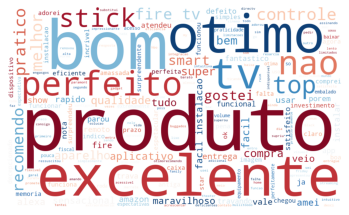

In [9]:
wcl = WordCloud(stopwords=stoplist_pt, colormap="RdBu", background_color="white", width=1000, height=600)
plt.imshow(wcl.generate(text))
plt.axis('off')

### Frequency by type

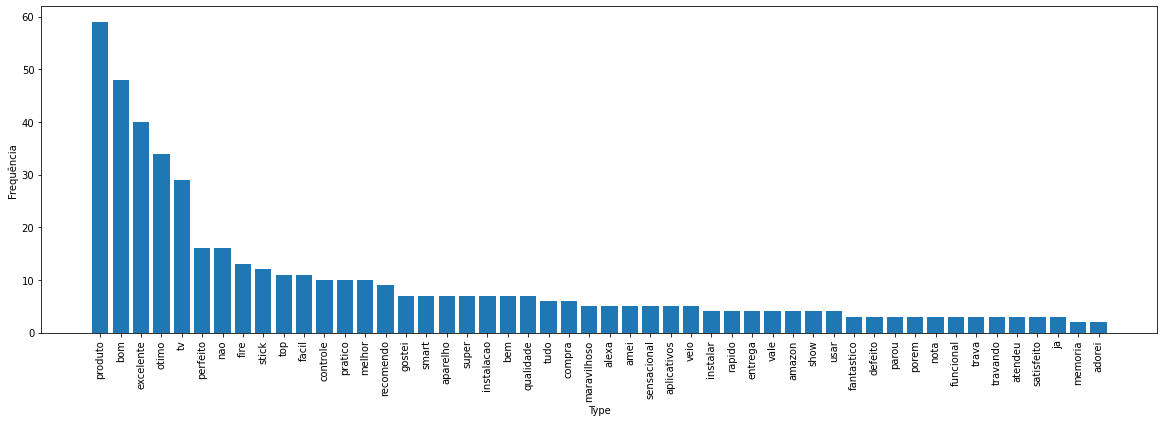

In [10]:
words = [i for i in tokens if i.lower() not in stoplist_pt]

tokens_palavras=[w for w in words if w.isalpha() and w!="s" and w!="t"]
fdist=nltk.FreqDist(tokens_palavras)
fdist_sort=fdist.most_common(50)
labels=[w for (w,f) in fdist_sort ]
freq=[f for (w,f) in fdist_sort ]
x_pos = np.arange(len(freq))
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(6)
plt.bar(x_pos, freq)
plt.xticks(x_pos, labels, rotation=90)
plt.ylabel('Frequência')
plt.xlabel('Type')
plt.show()

### Frequency (f), Position (r) and Product (f*r)

In [11]:
num_types=len(set(tokens_palavras))
fdist=nltk.FreqDist(tokens_palavras)
fdist_sort=fdist.most_common(num_types)
types=[w for (w,f) in fdist_sort ]
freqs=[f for (w,f) in fdist_sort ]
ranks=list(range(1,num_types+1))
produto=np.array(freqs)*np.array(ranks)
df = pd.DataFrame(list(zip(types, freqs, ranks, produto)),
columns =['Type','Frequência(f)','Posto(r)',"f*r"])
df.head(10)

,Type,Frequência(f),Posto(r),f*r
0,produto,59,1,59
1,bom,48,2,96
2,excelente,40,3,120
3,otimo,34,4,136
4,tv,29,5,145
5,perfeito,16,6,96
6,nao,16,7,112
7,fire,13,8,104
8,stick,12,9,108
9,top,11,10,110


### Mandelbrot

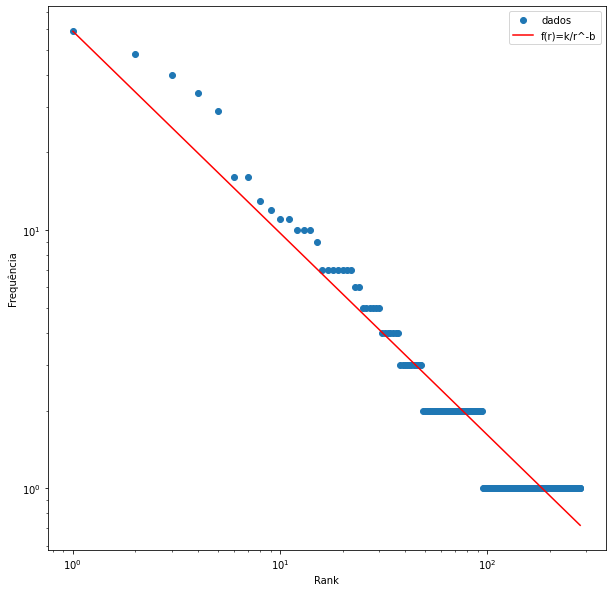

Valor estimado de b = -0.78
Valor estimado de k = 58.92


In [12]:
def func(x, a, b):
  y=a+b*x
  return y
y=np.log(np.array(freqs))
x=np.log(np.array(ranks))
w, pcov = curve_fit(func, xdata = x, ydata = y, method='lm')
a=w[0]
b=w[1]
k=math.exp(a)
f=plt.figure()
plt.plot(ranks, freqs,'o')
plt.xscale("log")
plt.yscale("log")
plt.plot(ranks,k/(np.array(ranks)**(-b)),'r')
plt.legend(('dados','f(r)=k/r^-b'),loc='upper right')
plt.ylabel('Frequência')
plt.xlabel('Rank')
f.set_figwidth(10)
f.set_figheight(10)
plt.show()
print("Valor estimado de b = {:.2f}".format(b))
print("Valor estimado de k = {:.2f}".format(k))